# Iris Classification Method

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition as a non-parametric technique.<sup>1</sup> KNN is considered to be a supervised learning method, where a set of classifications is known, and the KNN algorithm is used to predict a classification, based off of a training and test data set. This method is used in both regression and classification methods.

- In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

- In k-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.

k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification. The k-NN algorithm is among the simplest of all machine learning algorithms.<sup>2</sup>


1. http://www.saedsayad.com/k_nearest_neighbors.htm
2. https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

## Table of Contents

   - <a href="#one">Import Libraries</a>
   - <a href="#two">Import Data</a>
   - <a href="#three">Plot Data</a>
   - <a href="#four">Create Training and Test Data Sets</a>
   - <a href="#five">Build KNN Model</a>
   - <a href="#six">Validate Model</a>

### <a id="one">Import Libraries</a>

In [100]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
plt.style.use('ggplot')
%matplotlib inline

### <a id="two">Import Data</a>

In [101]:
# Define column names
names = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']

# Loading training data
df_iris = pd.read_csv('/Users/danehamlett/Desktop/School/Machine Learning/iris.data.txt', header=None, names=names)
df_iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### <a id="three">Plot Data</a>

#### Sepal Length & Width Analysis

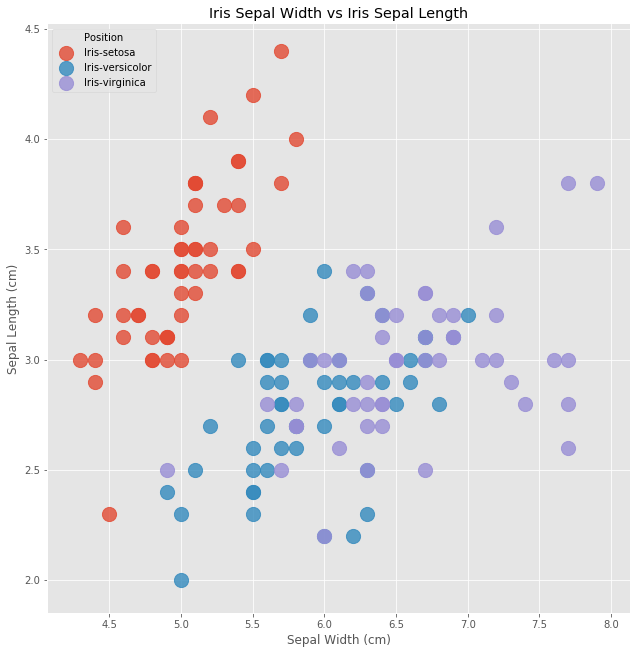

In [102]:
# Generate plot
ax = sns.lmplot(x="Sepal_Length", y="Sepal_Width", data=df_iris, hue='Species', fit_reg=False, size=9, aspect=1, legend=False, scatter_kws={"s": 200})
ax.set(xlabel='Sepal Width (cm)', ylabel='Sepal Length (cm)', title="Iris Sepal Width vs Iris Sepal Length")
plt.legend(loc='upper left', title='Position')
plt.show()

#### Petal Length & Width Analysis

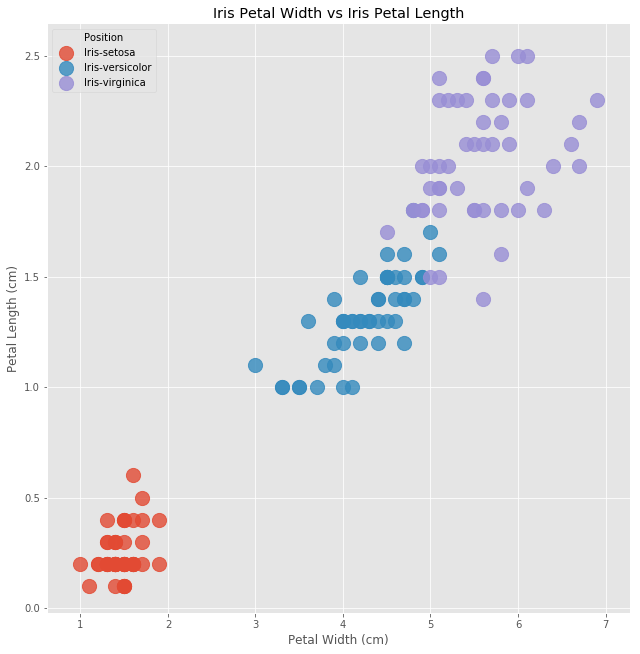

In [103]:
# Generate plot
ax = sns.lmplot(x="Petal_Length", y="Petal_Width", data=df_iris, hue='Species', fit_reg=False, size=9, aspect=1, legend=False, scatter_kws={"s": 200})
ax.set(xlabel='Petal Width (cm)', ylabel='Petal Length (cm)', title="Iris Petal Width vs Iris Petal Length")
plt.legend(loc='upper left', title='Position')
plt.show()

#### Swarm Plot

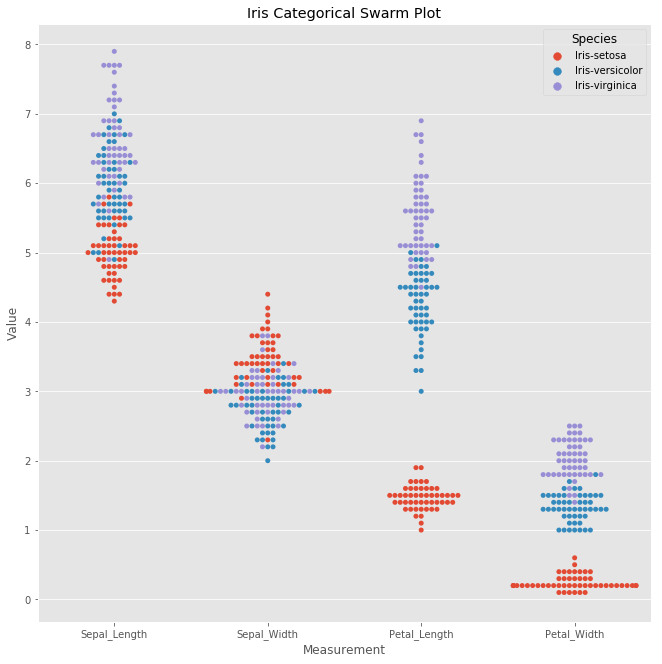

In [104]:
# Set plot dimensions
plt.figure(figsize=(11,11))

# Generate plot
iris = pd.melt(df_iris, "Species", var_name="Measurement")
dx = sns.swarmplot(x="Measurement", y="value", hue="Species", data=iris)
dx.set(ylabel='Value',title="Iris Categorical Swarm Plot")
plt.show()

### <a id="four">Create Training and Test Data Sets</a>

In [109]:
# Create design matrix X and target vector y
X = np.array(df_iris.ix[:, 0:4])
y = np.array(df_iris['Species'])

# Split into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

### <a id="five">Build KNN Model</a>

In [106]:
# Instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
knn.fit(X_train, y_train)

# Predict the response
pred = knn.predict(X_test)

# Evaluate the model accuracy
print(round(accuracy_score(y_test, pred),3))

0.974


### <a id="six">Validate Model</a>

In [107]:
# Create an odd list of K for KNN
myList = list(range(1,50))

# Subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# New list that will hold cv scores
cv_scores = []

# Perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Create a data frame for visualization
df_neighbors = pd.DataFrame(neighbors,columns = ["K"])
df_scores = pd.DataFrame(cv_scores,columns = ["Score"])
df_scores = pd.concat([df_neighbors,df_scores],axis=1)
df_scores.head()

,K,Score
0,1,0.940152
1,3,0.965909
2,5,0.947576
3,7,0.938485
4,9,0.938485


The optimal number of neighbors is 3.


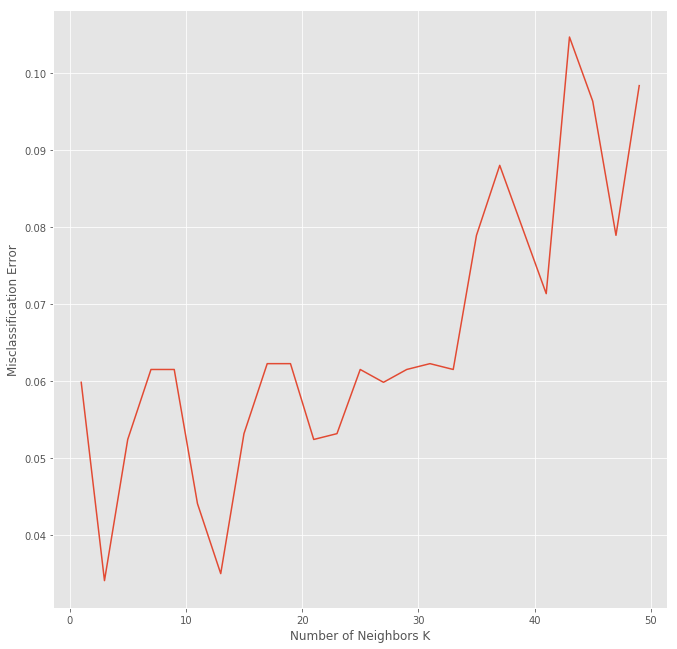

In [108]:
# Changing to misclassification error - Mean Squared Error (values closer to zero are better)
MSE = [1 - x for x in cv_scores]

# Determine the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k + ".")

# Plot misclassification error vs k
plt.figure(figsize=(11,11))
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()